<a href="https://colab.research.google.com/github/mostainRifat/aa-ML-Colab/blob/main/26_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

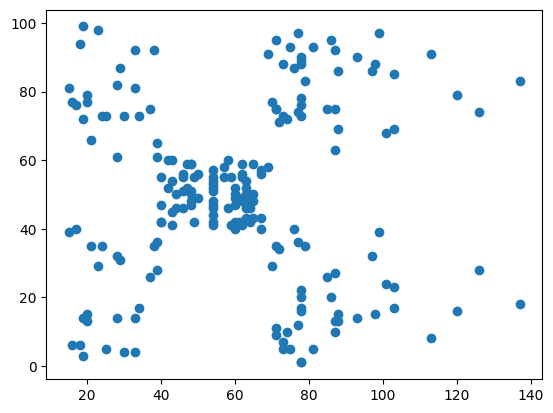

In [12]:
dataset = pd.read_csv('/content/drive/MyDrive/ Data sets Machine Learning A-Z/Part 4 - Clustering/Section 24 - K-Means Clustering/Python/Mall_Customers.csv')
dataset.head()

plt.scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'])

In [6]:
X = dataset.iloc[:,[3,4]].values
#print(X)

## Using the ELBOW METHOD

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


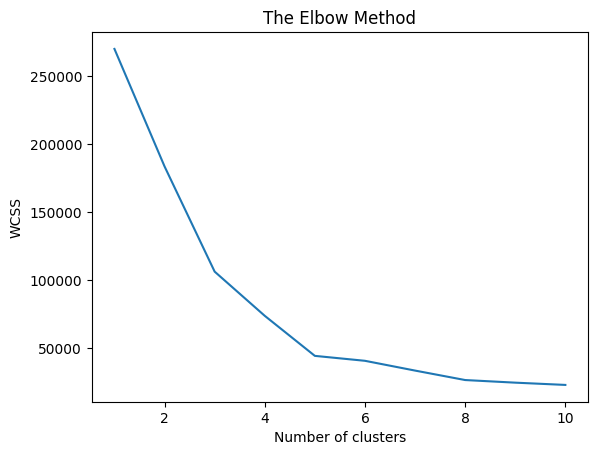

In [9]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means Model

In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [16]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualization

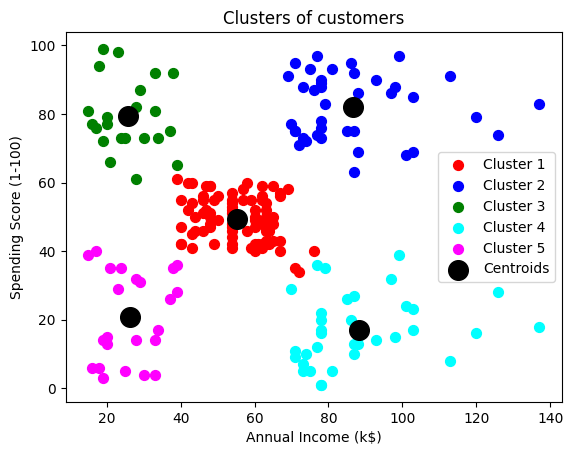

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [20]:
dataset['Cluster'] = y_kmeans+1
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,3
4,5,Female,31,17,40,5


In [26]:
# Sort dataset by 'Cluster' column
df_sorted = dataset.sort_values(by='Cluster')

# Display first 10 rows of sorted dataset
df_sorted.head(30)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
48,49,Female,29,40,42,1
49,50,Female,31,40,42,1
50,51,Female,49,42,52,1
51,52,Male,33,42,60,1
52,53,Female,31,43,54,1
53,54,Male,59,43,60,1
54,55,Female,50,43,45,1
55,56,Male,47,43,41,1
56,57,Female,51,44,50,1
57,58,Male,69,44,46,1
